<a href="https://colab.research.google.com/github/paul-padilla/Bangladeshi-Shrimp-Farming/blob/main/FinalShrimpProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from tqdm import tqdm

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

url = 'https://raw.githubusercontent.com/johnbiswas/MECE4520/main/ShrimpV3.csv'
shrimpdata = pd.read_csv(url)
shrimpdata = shrimpdata.rename(columns = {'CurrentPrevalance(%)':'CurrentPrevalence', 'StockingDensity_PL/40MeterSquare':'StockingDensity_PLFortyMeterSquare'})
shrimpdata = shrimpdata.drop(['PreviousPrevalence(%)', 'StockingAge_Days', 'StockingDensity_PLFortyMeterSquare', 'PeriodOfFallow', 'CanalDepth_ft', 'Salinity', 'FarmerAge', 'pH', 'Temperature', 'CropRotation', 'FeedType', 'SludgeRemovalInterval', 'WaterSource_IndirectNatural'], axis=1)

#shrimpdata.fillna(shrimpdata.mean(),inplace=True)
columns = list(shrimpdata.columns)
cont_vars = shrimpdata[['InvolveWithShrimpFarming','GherDepth_ft', 'CurrentPrevalence']]
continuous = list(cont_vars.columns)
#shrimpdata[continuous] = shrimpdata[continuous].astype('float128')
numerics = []
for i in columns:
   if shrimpdata[i].dropna().astype(str).str.replace(".", "",regex=True).str.isnumeric().product() == 1:
    numerics+=[i]

shrimpdata[numerics] = shrimpdata[numerics].fillna(shrimpdata[numerics].mean(axis=0))
#shrimpdata
cat_vars = shrimpdata.drop(cont_vars.columns, axis = 1)


###Classification variable:
### FarmerEducation, Zone, PriorLandUse, SoilType, FertilizerUse, ChemicalUsePondPreparation, FeedType
columns = list(shrimpdata.columns)

In [3]:
()### Variables to keep
### Temperature, Ph, GherDepth,

cat_vars = shrimpdata.drop(cont_vars.columns, axis = 1)

# Exploratory Data Analysis


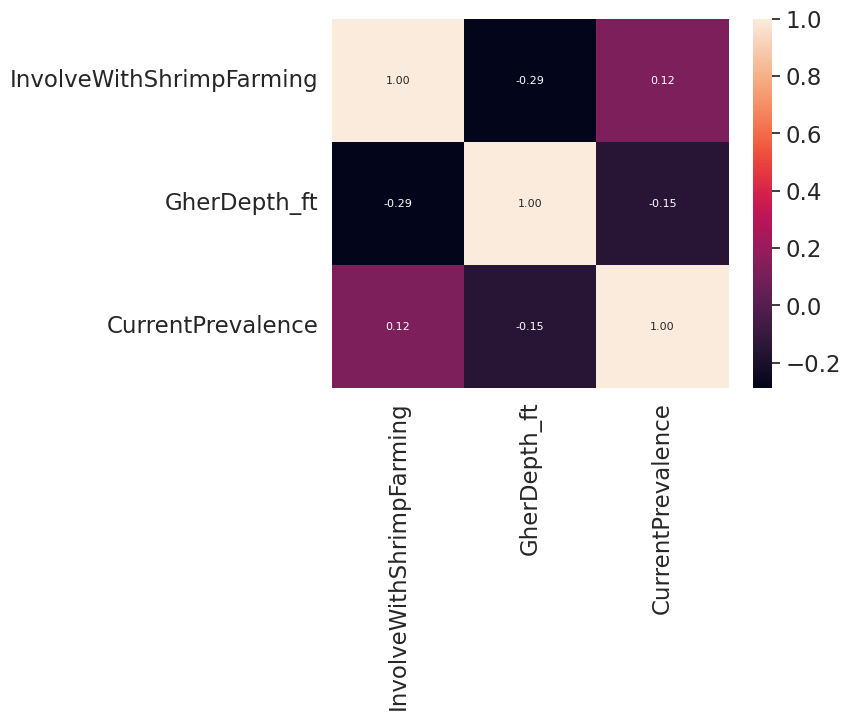

In [2]:
### Exploratory Data Analysis
corr = cont_vars.corr()
sns.heatmap(corr, annot=True, fmt = '0.2f', annot_kws = {'size':8})
continuous = list(cont_vars.columns)

In [4]:
# import warnings

# # Suppress FutureWarning messages
# warnings.simplefilter(action='ignore', category=FutureWarning)

# categorical_features = cat_vars.columns

# fig, axes = plt.subplots(
#                      ncols=6,
#                      nrows=4,
#                      figsize=(40, 30))

# ax = axes.flatten()
# for i, categorical_feature in enumerate(cat_vars[categorical_features]):
#   if i < len(cat_vars.columns)-1:
#     cat_vars.groupby(cat_vars.columns[i]).sum().plot(kind = "bar", ax=ax[i], legend=None, color = ['red']).set_title(categorical_feature)
#     # cat_vars[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)

# fig.tight_layout()
# fig.show()


In [ ]:
# fig2, axes2 = plt.subplots(
#                      ncols=6,
#                      nrows=4,
#                      figsize=(40, 30))

# ax2 = axes2.flatten()
# for i, categorical_feature in enumerate(cat_vars[categorical_features]):
#   if i < len(cat_vars.columns)-1:
#     cat_vars[categorical_feature].value_counts().plot(kind = "bar", ax=ax2[i]).set_title(categorical_feature)

# fig2.tight_layout()
# fig2.show()

In [ ]:
# cat_vars.groupby('PLQuality').sum()
# cat_vars.columns

# Linear Regression

In [5]:
### Linear Regression
varlist = columns[0:-3]
string = 'CurrentPrevalence ~ C(FarmerEduaction)'
for i in varlist[1:]:
  if i in continuous:
    string += ' + '+i
  else:
    string += ' + C('+i+')'

print(string)
model_allvars = smf.ols(formula=string, data=shrimpdata)
result_allvars = model_allvars.fit()
print(result_allvars.summary()) #THE GOOD ONE USING ALL VARIABLES

CurrentPrevalence ~ C(FarmerEduaction) + InvolveWithShrimpFarming + C(Zone) + C(PriorLandUse) + C(SoilType) + GherDepth_ft + C(FertilizerUse) + C(ChemicalUsePondPreparation) + C(ChemicalUseWaterTreatment) + C(Aerator) + C(SludgeRemovalMethods) + C(MaintainAndRepairDikes) + C(WaterSource_DirectNatural) + C(WaterComingViaOtherFarms) + C(WaterExchangeFrequency) + C(CultureMethod) + C(SourceOfFingerling) + C(PLQuality) + C(FeedAdditives)
                            OLS Regression Results                            
Dep. Variable:      CurrentPrevalence   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2.928
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           5.83e-07
Time:                        03:23:49   Log-Likelihood:                -1115.9
No. Observations:                 233   AIC:                             2312.
Df Residu

# Logistic Regression

In [6]:
cat_vars = shrimpdata.drop(cont_vars.columns, axis = 1)
shrimpdata[cat_vars.columns] = cat_vars.astype(str)
one_hot_data = pd.get_dummies(shrimpdata,drop_first=True)#.drop(['VirusDetected_1'], axis = 1)
#shrimpdata[continuous] = shrimpdata[continuous].astype('float128')



# # log_var = "VirusDetected_1 ~ FarmerAge"

# # for i in one_hot_data.columns[1:-1]:
# #   log_var += " + " + i

# log_var = "VirusDetected ~ " + string

In [ ]:
# import statsmodels.formula.api as sm
# import statsmodels.api as sma
# import patsy

# #sludge removal interval and indirect water source removed

# mylogit = sm.glm(formula = "VirusDetected ~ FarmerAge + C(FarmerEduaction) + InvolveWithShrimpFarming + C(Zone) + C(PriorLandUse) + C(SoilType) + CanalDepth_ft + GherDepth_ft + C(FertilizerUse) + C(ChemicalUsePondPreparation) + C(ChemicalUseWaterTreatment) + C(Aerator) + C(SludgeRemovalMethods) + C(MaintainAndRepairDikes) + PeriodOfFallow + C(WaterSource_DirectNatural) + C(WaterComingViaOtherFarms) + C(WaterExchangeFrequency) + C(CultureMethod) + C(SourceOfFingerling) + StockingDensity_PLFortyMeterSquare + StockingAge_Days + C(PLQuality) + C(CropRotation) + C(FeedType) + C(FeedAdditives) + C(FootBath) + Temperature + pH",
#                  data = shrimpdata,
#                  family = sma.families.Binomial()).fit()

# mylogit.summary()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pd.set_option("display.max_columns", 500)
# sns.set(font_scale=1.5)
# sns.set_style("whitegrid", {'grid.linestyle':'--'})

# sns.scatterplot(x="Temperature", y="VirusDetected", data=shrimpdata)
# plt.tight_layout()

# model = smf.glm(
#     formula='VirusDetected~ Temperature',
#     data=shrimpdata,
#     family=sm.families.Binomial(),
# )
# result = model.fit()
# print(result.summary())

# sns.regplot(x="Temperature", y="VirusDetected", data=shrimpdata, logistic=True, ci=None)

# Logistic Regression (with Training)

In [7]:
df = one_hot_data.drop(['CurrentPrevalence'],axis=1)
df.columns = df.columns.str.replace(" ", "", regex=True)
df.columns = df.columns.str.replace("'", "",regex=True)
columns = list(df.columns)
columns.remove('VirusDetected_1')
string = "VirusDetected_1 ~ "
varlist = columns
for i in varlist:
  if i == varlist[0]:
    string += i
  else:
    string += " + "+i

train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state =30)
x_train = train[varlist]; y_train = train['VirusDetected_1']
x_test = test[varlist]; y_test = test['VirusDetected_1']

model = smf.glm(
    formula=string,
    data=df,
    family=sm.families.Binomial(),
)

result = model.fit()
y_pred = result.predict(x_test)

def convert_prob_to_label(prob, cutoff = 0.5):
    label = None
    if prob > cutoff:
        label = 1
    else:
        label = 0
    return label

pred_labels = list(map(convert_prob_to_label, y_pred))
pred_labels = np.asarray(pred_labels)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_labels)
mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test)
print(f"Misclassification rate = {mis_rate :.3f}")
print(result.summary())

Misclassification rate = 0.743
                                  Generalized Linear Model Regression Results                                  
Dep. Variable:     ['VirusDetected_1[False]', 'VirusDetected_1[True]']   No. Observations:                  233
Model:                                                             GLM   Df Residuals:                      192
Model Family:                                                 Binomial   Df Model:                           40
Link Function:                                                   Logit   Scale:                          1.0000
Method:                                                           IRLS   Log-Likelihood:                -107.53
Date:                                                 Mon, 21 Oct 2024   Deviance:                       215.05
Time:                                                         03:27:27   Pearson chi2:                     259.
No. Iterations:                                                     20   

# K-Fold for Logistic Regression

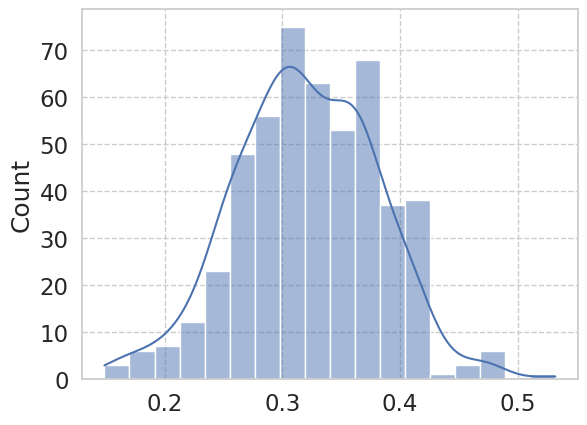

In [8]:
### K-Fold

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = df[varlist]
y = one_hot_data['VirusDetected_1']

cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
model = LogisticRegression()

# getting misclassification rate
scores = 1 - cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=10)
import seaborn as sns
ax = sns.histplot(x=scores, kde=True)

# Decision Tree

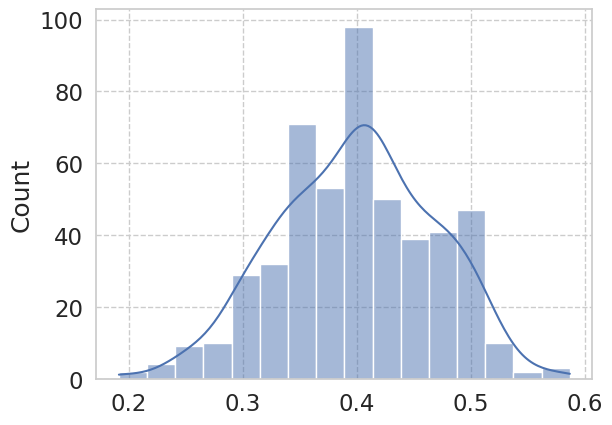

In [9]:
### Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from lightgbm import LGBMRegressor
#from category_encoders import OrdinalEncoder

def error_rate(p: float):
    """Classification error rate for a given binary class ratio"""
    return p if p < 0.5 else 1 - p

def gini_index(p: float):
    """Gini index for a given binary class ratio."""
    return 2 * p * (1 - p)

def entropy(p: float):
    """Entropy for a given binary class ratio, normalized by ln(2)"""
    return -(p * np.log(p + 1e-16) + (1 - p) * np.log(1 - p + 1e-16)) / (np.log(2) / 0.5)

# data = pd.DataFrame()
# data['A'] = ['a','a','b','a']
# data['B'] = ['c','b','a','b']
# data['C'] = [2, 3, 1, 4]
# data['Class'] = ['n','n','y','n']

# data[['B','C']] = data[['B','C']].astype(str)

#tree = DecisionTreeClassifier()
# one_hot_data = pd.get_dummies(data[['A','B','C']],drop_first=True)
# tree.fit(one_hot_data, data['Class'])

# data

# cat_vars = shrimpdata.drop(cont_vars.columns, axis = 1)
# shrimpdata[cat_vars.columns] = cat_vars.astype(str)
# one_hot_data = pd.get_dummies(shrimpdata,drop_first=True)

dt_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=20,
)
features = df.drop(['VirusDetected_1'], axis = 1).columns
label = 'VirusDetected_1'
dt_model.fit(X=train[features], y=train[label])
y_pred_tree = dt_model.predict(test[features])
conf_matrix = confusion_matrix(test[label], y_pred_tree)
mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test)
mis_rate

cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
model = DecisionTreeClassifier()

# getting misclassification rate
scores = 1 - cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=10)
import seaborn as sns
ax = sns.histplot(x=scores, kde=True)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=6)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_)

# import graphviz

# dot_data = tree.export_graphviz(
#     decision_tree=dt_model,
#     out_file=None,
#     feature_names=features,
#     class_names=["0", "1"],
#     filled=True,
#     rounded=True,
#     special_characters=True,
#     max_depth=20,
# )
# graph = graphviz.Source(dot_data)
# graph.render("shrimp_sick")
# graph

# Neural Network

In [ ]:
# Neural Network Code

from typing import Tuple

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

shrimpdata["label"] = shrimpdata["CurrentPrevalence"].apply(lambda x: 0 if x == 0 else 1)
#print(shrimpdata)

features = [
    'Temperature',
    'pH',
    'FarmerAge',
    'Salinity',
    'CurrentPrevalence',
    'InvolveWithShrimpFarming',
    'CanalDepth_ft',
    'PeriodOfFallow',
    'GherDepth_ft',
    'StockingDensity_PLFortyMeterSquare',
    'StockingAge_Days'
]
label = "label"


# train test split
X_raw, X_raw_test, Y, Y_test = train_test_split(
    shrimpdata[features].values, shrimpdata[label].values, test_size=0.3, random_state=42
)

# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)
X_test = scaler.transform(X_raw_test)

# formatting
Y = Y.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

#FORWARD PROPAGATION

# forward pass for a simple 2-layer NN, with 3 hidden units
np.random.seed(10)

def sigmoid(x):
    """Calculates sigmoid function."""
    return 1. / (1 + np.exp(-x))

# parameters for the first layer
W_1 = np.random.normal(size=(3, X.shape[1]))
print(f"Shape of W_1 is {W_1.shape}")

b_1 = np.random.normal(size=(3, 1))
print(f"Shape of b_1 is {b_1.shape}")

# parameters for the second layer
W_2 = np.random.normal(size=(1, 3))
print(f"Shape of W_2 is {W_2.shape}")

b_2 = np.random.normal(size=(1, 1))
print(f"Shape of b_1 is {b_2.shape}")

# calculate the forward propagation
Z_1 = X @ W_1.T
print(f"\nShape of Z_1 is {Z_1.shape}")
print("Samples for Z_1:")
print(Z_1[:5])

A_1 = sigmoid(Z_1 + b_1.T)
print(f"Shape of A_1 is {A_1.shape}")
print("Samples for A_1:")
print(A_1[:5])

Z_2 = A_1 @ W_2.T
print(f"\nShape of Z_2 is {Z_2.shape}")
print("Samples for Z_2:")
print(Z_1[:5])

A_2 = Y_hat = sigmoid(Z_2 + b_2.T)
print(f"Shape of A_2 is {A_2.shape}")
print("Samples for A_2:")
print(A_2[:5])

In [ ]:
def forward_prop(
    X: np.array,
    W_1: np.array,
    b_1: np.array,
    W_2: np.array,
    b_2: np.array,
) -> Tuple:
    """Performs the forward propagation of the given NN."""
    # Note the NN structure is passed in from outside.
    Z_1 = X @ W_1.T
    A_1 = sigmoid(Z_1 + b_1.T)

    Z_2 = A_1 @ W_2.T
    A_2 = Y = sigmoid(Z_2 + b_2.T)

    return A_2, Z_2, A_1, Z_1

Y_hat, _, _, _ = forward_prop(X=X, W_1=W_1, b_1=b_1, W_2=W_2, b_2=b_2)

def derivatives_by_backprop(
    X: np.array,
    Y: np.array,
    W_1: np.array,
    b_1: np.array,
    W_2: np.array,
    b_2: np.array,
) -> Tuple:
    """Calculates the derivatives of the parameters by backforward propagation.

    Here we assume it is a binary classification problem, with sigmoid activation functions.
    """
    # forward propagation
    dW_2, db_2, dW_1, db_1 = 0, 0, 0, 0
    Y_hat, Z_2, A_1, Z_1 = forward_prop(X=X, W_1=W_1, b_1=b_1, W_2=W_2, b_2=b_2)
    n = len(Y_hat)

    loss = -np.mean(np.multiply(Y, np.log(Y_hat)) + np.multiply(1 - Y, np.log(1 - Y_hat)))

    dZ_2 = Y_hat - Y
    dW_2 = dZ_2.T @ A_1 / n
    db_2 = np.mean(dZ_2.T, axis=1, keepdims=True)

    dZ_1 = np.multiply(dZ_2 @ W_2, np.multiply(A_1, 1 - A_1))
    dW_1 = (dZ_1.T @ X) / n
    db_1 = np.mean(dZ_1.T, axis=1, keepdims=True)

    return dW_2, db_2, dW_1, db_1, loss

dW_2, db_2, dW_1, db_1, loss = derivatives_by_backprop(X=X, Y=Y, W_1=W_1, b_1=b_1, W_2=W_2, b_2=b_2)

def gradient_descent(
    X: np.array,
    Y: np.array,
    W_1_init: np.array,
    b_1_init: np.array,
    W_2_init: np.array,
    b_2_init: np.array,
    learning_rate: float = 0.01,
    epsilon: float = 1e-6,
    verbose: bool = False,
) -> Tuple:
    """Runs gradient descent to fit the NN via backprop."""
    W_1 = W_1_init
    b_1 = b_1_init
    W_2 = W_2_init
    b_2 = b_2_init
    losses = [float("inf"), ]
    roc_auc_scores = [0.5, ]

    diff_in_loss = float("inf")
    iteration = 0
    while abs(diff_in_loss) > epsilon:
        iteration += 1
        dW_2, db_2, dW_1, db_1, loss = derivatives_by_backprop(
            X=X, Y=Y, W_1=W_1, b_1=b_1, W_2=W_2, b_2=b_2
        )

        W_1 -= learning_rate * dW_1
        b_1 -= learning_rate * db_1
        W_2 -= learning_rate * dW_2
        b_2 -= learning_rate * db_2

        losses.append(loss)
        diff_in_loss = losses[-1] - losses[-2]

        Y_hat, _, _, _ = forward_prop(X=X, W_1=W_1, b_1=b_1, W_2=W_2, b_2=b_2)
        roc_auc = roc_auc_score(y_true=Y, y_score=Y_hat)
        roc_auc_scores.append(roc_auc)

        if verbose and iteration % 10 == 0:
            print(loss, roc_auc)
    return W_1, b_1, W_2, b_2, losses

In [ ]:
# parameters for the first layer
np.random.seed(42)
W_1_init = np.random.normal(size=(3, X.shape[1]))
b_1_init = np.random.normal(size=(3, 1))

# parameters for the second layer
W_2_init = np.random.normal(size=(1, 3))
b_2_init = np.random.normal(size=(1, 1))


W_1, b_1, W_2, b_2, losses = gradient_descent(
    X=X,
    Y=Y,
    W_1_init=W_1_init,
    b_1_init=b_1_init,
    W_2_init=W_2_init,
    b_2_init=b_2_init,
    learning_rate=0.1,
    epsilon=1e-3,
    verbose=True,
)

# evaluate the model on the test set
Y_test_hat, _, _, _ = forward_prop(X=X_test, W_1=W_1, b_1=b_1, W_2=W_2, b_2=b_2)
roc_auc_score(y_true=Y_test, y_score=Y_test_hat)